<a href="https://colab.research.google.com/github/mparag019/DL-Assignment-1/blob/main/DLAssign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import random
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import sys

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train/255
x_test = x_test/255

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

k = 10

### Question 1


In [6]:
def showImage():
  label = []
  images = []

  for i in range(len(x_train)):
    if len(label) == 10:
      break
    if y_train[i] not in label:
      images.append(x_train[i])
      label.append(y_train[i])
  for i in range(len(images)):
    plt.imshow(images[i], cmap = 'gray')
    plt.title(class_labels[label[i]])
    plt.axis("off")
    plt.show()


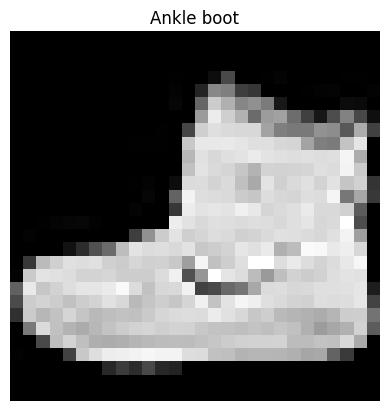

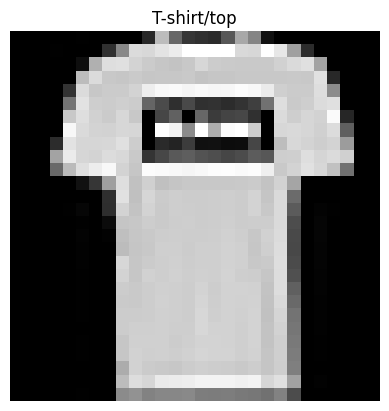

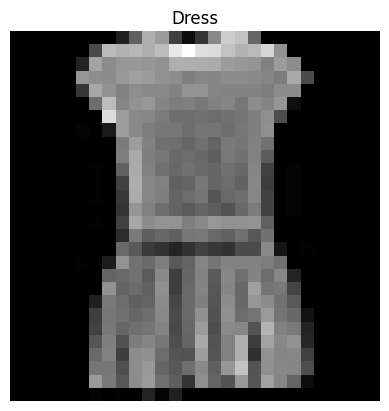

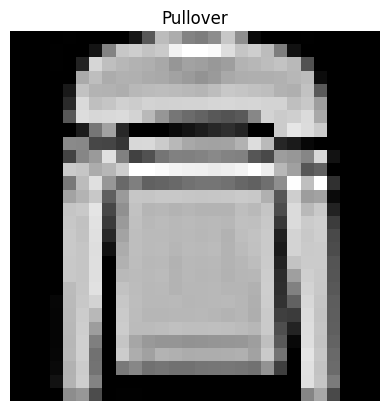

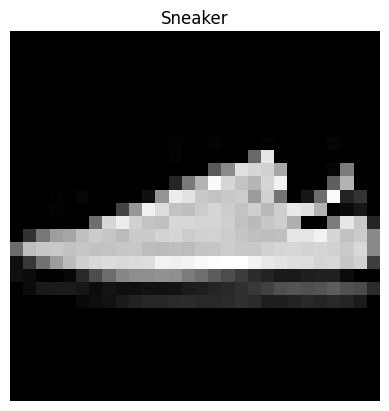

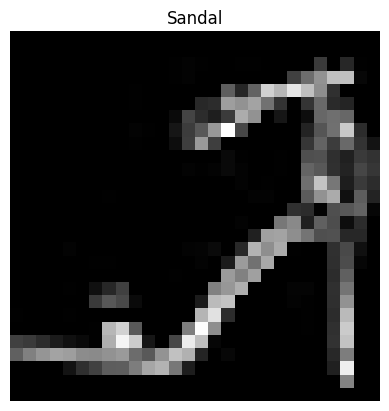

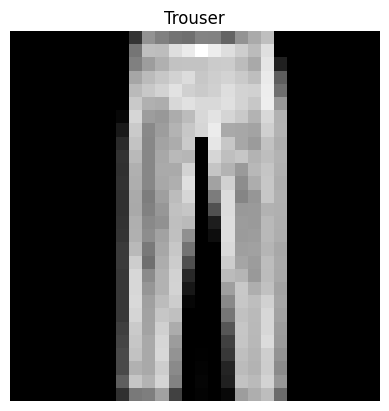

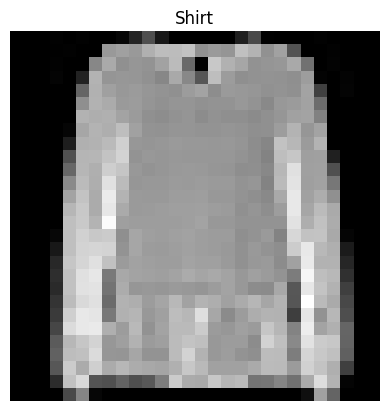

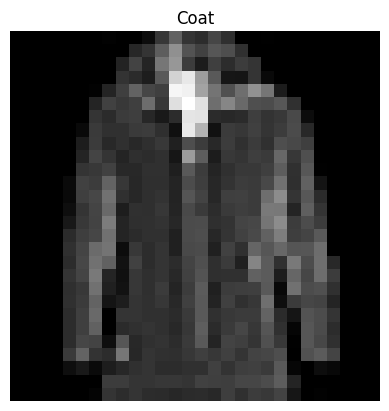

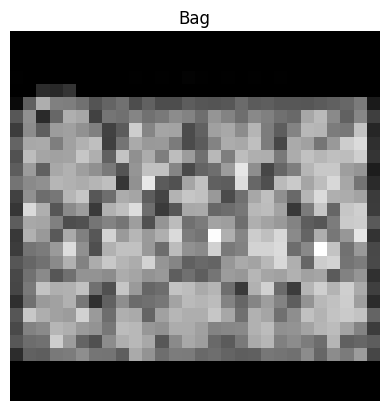

In [7]:
showImage()

#Question 2


In [8]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [9]:
def relu(x):
  if x < 0:
    return 0
  else:
    return x

In [10]:
def tanh(x):
  return np.tanh(x)

In [11]:
def softmax(x):
  max_float_value = sys.float_info.max
  sum = 0.0
  for i in range(len(x)):
    if (sum + np.exp(x[i]) <= max_float_value):
      sum += np.exp(x[i])
    else:
      sum = max_float_value
  y = []
  for i in range(len(x)):
    y_i = np.exp(x[i])/sum
    y.append(y_i)
  return y


In [12]:
def initialize_param(input_size, n, neurons):
  W = []
  b = []
  for i in range(0, n+1):
    if i == 0:
      W_i = np.random.rand(neurons,input_size) * 0.01
      W.append(W_i)
    elif i == n:
      W_i = np.random.rand(10,neurons) * 0.01
      W.append(W_i)
    else :
      W_i = np.random.rand(neurons,neurons) * 0.01
      W.append(W_i)

    if i == n:
      b_i = np.random.rand(10,1) * 0.01
      b.append(b_i)
    else :
      b_i = np.random.rand(neurons,1) * 0.01
      b.append(b_i)
  return W, b

In [13]:
def xavier_initialization(input_size, n, neurons):
  W = []
  b = []
  for i in range(0, n+1):
    if i == 0:
      variance = 6.0 / (input_size + neurons)
      std_dev = np.sqrt(variance)
      W_i = np.random.normal(0, std_dev, size=(neurons, input_size))
      W.append(W_i)
    elif i == n:
      variance = 6.0 / (10 + neurons)
      std_dev = np.sqrt(variance)
      W_i = np.random.normal(0, std_dev, size=(10, neurons))
      W.append(W_i)
    else :
      variance = 6.0 / (neurons + neurons)
      std_dev = np.sqrt(variance)
      W_i = np.random.normal(0, std_dev, size=(neurons, neurons))
      W.append(W_i)

    if i == n:
      variance = 2.0 / (10 + 1)
      std_dev = np.sqrt(variance)
      b_i = np.random.normal(0, std_dev, size=(10, 1))
      # b_i = np.zeros((10,1))
      b.append(b_i)
    else :
      variance = 2.0 / (neurons + 1)
      std_dev = np.sqrt(variance)
      b_i = np.random.normal(0, std_dev, size=(neurons, 1))
      # b_i = np.zeros((neurons,1))
      b.append(b_i)
  return W, b

In [14]:
def forward_propogation(func, x, W, b, n):
  a = []
  h = []
  for k in range(n+1):
    if k == 0:
      a_k = np.add(np.dot(W[k], x), b[k])
      a.append(a_k)
    else:
      a_k = np.add(np.dot(W[k], h[k-1]), b[k])
      a.append(a_k)
    if k == n: break
    h_k = []
    a[k] = np.clip(a[k], -709.78, 709.78)

    for j in range(neurons):
      if func == "sigmoid":
        h_kj = sigmoid(a[k][j][0])
      elif func == "ReLU":
        h_kj = relu(a[k][j][0])
      elif func == "tanh":
        h_kj = tanh(a[k][j][0])
      h_k.append(h_kj)
    h_k = np.array(h_k).reshape(neurons,1)
    h.append(h_k)
  a[n] = np.clip(a[n], -500, 500)
  y_pred = np.array(softmax(a[n]))
  return a, h, y_pred


In [ ]:
x = x_train[0].flatten().reshape(784,1)
x_len = len(x)
# print(x.shape)
W, b= initialize_param(x_len, n, neurons)
# print(W[0].shape)
# print(W[1].shape)
# print(W[2].shape)
# print(b[0].shape)
# print(b[1].shape)
# print(b[2].shape)

a, h, y_pred = forward_propogation("ReLU", x, W, b, n)
# print(a)
# print(h)
# print(y_pred)
# print(y_pred.shape)
# print(y_train[0])

#Question 3, Question 4

In [16]:
def diff_g(func, a):
  diff_a = []
  if func == "sigmoid":
    for i in a:
      i = np.clip(i, -709.78, 709.78)
      diff_a.append(sigmoid(i[0]) * (1 - sigmoid(i[0])))
  elif func == "tanh":
    for i in a:
      diff_a.append(1 - tanh(i[0]) * tanh(i[0]))
  elif func == "ReLU":
    for i in a:
      if i[0] > 0: diff_a.append(1)
      else :diff_a.append(0)
  diff_a = np.array(diff_a).reshape(len(diff_a),1)
  return diff_a

In [17]:
def back_propogation(func, a, h, y_pred, y, x):
  e_y = np.zeros(10).reshape(10,1)
  e_y[y] = 1

  grad_W = []
  grad_b = []
  grad_h = []
  grad_a = []
  grad_a_n = np.subtract(y_pred, e_y)
  grad_a.append(grad_a_n)
  for k in range(n, -1, -1):
    if k == 0:
      grad_W_k = np.dot(grad_a[len(grad_a) - 1], x.T)
    else:
      grad_W_k = np.dot(grad_a[len(grad_a) - 1], h[k-1].T)

    grad_b_k = grad_a[len(grad_a) - 1]
    grad_W.append(grad_W_k)
    grad_b.append(grad_b_k)

    if k == 0: break

    grad_hprev = np.dot(W[k].T, grad_a[len(grad_a) - 1])

    g = diff_g(func, a[k-1])
    grad_aprev = grad_hprev * g

    grad_h.append(grad_hprev)
    grad_a.append(grad_aprev)

  return grad_W, grad_b




In [ ]:
x = x_train[0].flatten().reshape(784,1)
x_len = len(x)
y = y_train[0]

W, b= initialize_param(x_len, n, neurons)

a, h, y_pred = forward_propogation("ReLU", x, W, b, n)
grad_W, grad_b = back_propogation("ReLU",  a, h, y_pred, y, x)
# print(grad_W)
# print(grad_b)


**Gradient Descent**

In [19]:
def gradient_descent(func, x, y, W, b):
  a, h, y_pred = forward_propogation(func, x, W, b, n)
  grad_W, grad_b = back_propogation(func, a, h, y_pred, y, x)
  return grad_W, grad_b, y_pred


In [20]:
def mean_squared_loss(y_pred, y):
  loss = 0
  for i in range(len(y_pred)):
    if (i == y):
      loss += (y_pred[i][0] - 1)**2
    else:
      loss += (y_pred[i][0])**2
  return loss

In [21]:
def cross_entropy_loss(y_pred, y):
  return -np.log(y_pred[y][0])


In [22]:
def training_accuracy(x_train, activation_func, W, b, n, y_train):
  count = 0
  for i in range(int(0.9 * len(x_train))):
    a, h, y_pred = forward_propogation(activation_func, x_train[i].flatten().reshape(784,1), W, b, n)
    y_p = np.argmax(y_pred)
    if (y_train[i] == y_p):
      count+=1
  print("Training Acc: " , count/54000)

In [23]:
def validation_loss_and_accuracy(x_train, activation_func, W, b, n, y_train):
  count = 0
  loss = 0
  for i in range(54000, len(x_train)):
    a, h, y_pred = forward_propogation(activation_func, x_train[i].flatten().reshape(784,1), W, b, n)
    y_p = np.argmax(y_pred)
    loss += cross_entropy_loss(y_pred, y_train[i])
    if (y_train[i] == y_p):
      count+=1
  print("Validation loss: " , loss/6000)
  print("Validation Acc: ", count/6000)

In [33]:
def sgd(n, neurons, epochs, weight_decay, eta, batch_size, activation_func, W, b):
  batch = batch_size
  for j in range(epochs):
    loss = 0
    for i in range(int(0.9 * len(x_train))):

      if batch == batch_size:
        dw = [np.zeros_like(w) for w in W]
        db = [np.zeros_like(bias) for bias in b]

      grad_W, grad_b, y_pred = gradient_descent(activation_func, x_train[i].flatten().reshape(784,1), y_train[i], W, b)

      for k in range(len(dw)):
        dw[k] = np.add(dw[k], grad_W[len(dw) - k - 1])
      for k in range(len(db)):
        db[k] = np.add(db[k], grad_b[len(db) - k - 1])
      batch-=1

      if batch == 0:
        for k in range(len(dw)):
          W[k] = np.subtract(W[k],(eta * dw[k]/batch_size))
        for i in range(len(db)):
          b[k] = np.subtract(b[k],(eta * db[k]/batch_size))
        batch = batch_size

      loss += cross_entropy_loss(y_pred, y_train[i])


    print("Epoch : ", j+1)
    print("Training loss: " , loss/54000)

    training_accuracy(x_train, activation_func, W, b, n, y_train)

    validation_loss_and_accuracy(x_train, activation_func, W, b, n, y_train)



**Momentum Gradient Descent**

In [46]:
def momentum(n, neurons, epochs, weight_decay, eta, batch_size, activation_func, W, b):
  batch = batch_size
  beta = 0.9
  prev_vw = [np.zeros_like(w) for w in W]
  prev_vb = [np.zeros_like(bias) for bias in b]
  dw = [np.zeros_like(w) for w in W]
  db = [np.zeros_like(bias) for bias in b]
  for j in range(epochs):
    loss = 0
    for i in range(int(0.9 * len(x_train))):

      if batch == batch_size:
        dw = [np.zeros_like(w) for w in W]
        db = [np.zeros_like(bias) for bias in b]
        vw = [np.zeros_like(w) for w in W]
        vb = [np.zeros_like(bias) for bias in b]
      grad_W, grad_b, y_pred = gradient_descent(activation_func, x_train[i].flatten().reshape(784,1), y_train[i], W, b)

      for k in range(len(dw)):
        dw[k] = np.add(dw[k], grad_W[len(dw) - k - 1])
      for k in range(len(db)):
        db[k] = np.add(db[k], grad_b[len(db) - k - 1])
      batch-=1
      if batch == 0:
        for k in range(len(dw)):
          vw[k] = np.add(vw[k],np.add(beta * prev_vw[k], eta* dw[k]/batch_size))
          W[k] = np.subtract(W[k],vw[k])
        for k in range(len(db)):
          vb[k] = np.add(vb[k],np.add(beta * prev_vb[k], eta*db[k]/batch_size))
          b[k] = np.subtract(b[k],vb[k])
        prev_vw = vw
        prev_vb = vb
        batch = batch_size
      loss += cross_entropy_loss(y_pred, y_train[i])


    print("Epoch : ", j+1)
    print("Training loss: " , loss/54000)

    training_accuracy(x_train, activation_func, W, b, n, y_train)

    validation_loss_and_accuracy(x_train, activation_func, W, b, n, y_train)



**Nestrov Gradient Descent**

In [47]:
def nestrov(n, neurons, epochs, weight_decay, eta, batch_size, activation_func, W, b):
  batch = batch_size
  beta = 0.9
  prev_vw = [np.zeros_like(w) for w in W]
  prev_vb = [np.zeros_like(bias) for bias in b]
  vw = [np.zeros_like(w) for w in W]
  vb = [np.zeros_like(bias) for bias in b]

  for j in range(epochs):
    loss = 0
    for i in range(int(0.9 * len(x_train))):
      if batch == batch_size:
        dw = [np.zeros_like(w) for w in W]
        db = [np.zeros_like(bias) for bias in b]
        W_new = [np.zeros_like(w) for w in W]
        b_new = [np.zeros_like(bias) for bias in b]
        for k in range(len(dw)):
          vw[k] = beta * prev_vw[k]
        for k in range(len(db)):
          vb[k] = beta * prev_vb[k]
        for k in range(len(dw)):
          W_new[k] = np.subtract(W[k],vw[k])
        for k in range(len(db)):
          b_new[k] = np.subtract(b[k],vb[k])

      grad_W, grad_b, y_pred = gradient_descent(activation_func, x_train[i].flatten().reshape(784,1), y_train[i], W_new, b_new)

      for k in range(len(dw)):
        dw[k] = np.add(dw[k], grad_W[len(dw) - k - 1])
      for k in range(len(db)):
        db[k] = np.add(db[k], grad_b[len(db) - k - 1])
      batch-=1

      if batch == 0:
        for k in range(len(dw)):
          vw[k] = np.add(vw[k],eta* dw[k]/batch_size)
          W[k] = np.subtract(W[k],vw[k])
        for k in range(len(db)):
          vb[k] = np.add(vb[k],eta*db[k]/batch_size)
          b[k] = np.subtract(b[k],vb[k])
        prev_vw = vw
        prev_vb = vb
        batch = batch_size
      loss += cross_entropy_loss(y_pred, y_train[i])


    print("Epoch : ", j+1)
    print("Training loss: " , loss/54000)

    training_accuracy(x_train, activation_func, W, b, n, y_train)

    validation_loss_and_accuracy(x_train, activation_func, W, b, n, y_train)




**RMS Prop Gradient Descent**

In [48]:
def rmsprop(n, neurons, epochs, weight_decay, eta, batch_size, activation_func, W, b):
  batch = batch_size
  eps = 1e-10
  beta = 0.9
  vw = [np.zeros_like(w) for w in W]
  vb = [np.zeros_like(bias) for bias in b]

  for j in range(epochs):
    loss = 0
    for i in range(int(0.9 * len(x_train))):
      if batch == batch_size:
        dw = [np.zeros_like(w) for w in W]
        db = [np.zeros_like(bias) for bias in b]

      grad_W, grad_b, y_pred = gradient_descent(activation_func, x_train[i].flatten().reshape(784,1), y_train[i], W, b)

      for k in range(len(dw)):
        dw[k] = np.add(dw[k], grad_W[len(dw) - k - 1])
      for k in range(len(db)):
        db[k] = np.add(db[k], grad_b[len(db) - k - 1])
      batch-=1

      if batch == 0:
        for k in range(len(dw)):
          vw[k] = np.add(beta * vw[k],(1 - beta)* (dw[k]/batch_size)**2)
          W[k] = np.subtract(W[k],eta * (dw[k]/batch_size) / (np.sqrt(vw[k]) + eps))
        for k in range(len(db)):
          vb[k] = np.add(beta * vb[k],(1 - beta)*(db[k]/batch_size)**2)
          b[k] = np.subtract(b[k],eta * (db[k]/batch_size) / (np.sqrt(vb[k]) + eps))
        batch = batch_size
      loss += cross_entropy_loss(y_pred, y_train[i])


    print("Epoch : ", j+1)
    print("Training loss: " , loss/54000)

    training_accuracy(x_train, activation_func, W, b, n, y_train)

    validation_loss_and_accuracy(x_train, activation_func, W, b, n, y_train)



**Adam Gradient Descent**

In [34]:
def adam(n, neurons, epochs, weight_decay, eta, batch_size, activation_func, W, b):
  batch = batch_size

  eps = 1e-10
  beta1 = 0.9
  beta2 = 0.999

  mw = [np.zeros_like(w) for w in W]
  mb = [np.zeros_like(bias) for bias in b]
  mw_hat = [np.zeros_like(w) for w in W]
  mb_hat = [np.zeros_like(bias) for bias in b]
  vw = [np.zeros_like(w) for w in W]
  vb = [np.zeros_like(bias) for bias in b]
  vw_hat = [np.zeros_like(w) for w in W]
  vb_hat = [np.zeros_like(bias) for bias in b]

  t = 0
  for j in range(epochs):
    loss = 0
    for i in range(int(0.9 * len(x_train))):
      if batch == batch_size:
        dw = [np.zeros_like(w) for w in W]
        db = [np.zeros_like(bias) for bias in b]

      grad_W, grad_b, y_pred = gradient_descent(activation_func, x_train[i].flatten().reshape(784,1), y_train[i], W, b)

      for k in range(len(dw)):
        dw[k] = np.add(dw[k], grad_W[len(dw) - k - 1])
      for k in range(len(db)):
        db[k] = np.add(db[k], grad_b[len(db) - k - 1])
      batch-=1

      if batch == 0:
        for k in range(len(dw)):
          mw[k] = np.add(beta1 * mw[k], (1 - beta1) * (dw[k]/batch_size))
          vw[k] = np.add(beta2 * vw[k], (1 - beta2) * (dw[k]/batch_size)**2)
        for k in range(len(db)):
          mb[k] = np.add(beta1 * mb[k], (1 - beta1) * (db[k]/batch_size))
          vb[k] = np.add(beta2 * vb[k], (1 - beta2) * (db[k]/batch_size)**2)

        for k in range(len(dw)):
          mw_hat[k] = mw[k]/(1 - np.power(beta1, t+1))
          vw_hat[k] = vw[k]/(1 - np.power(beta2, t+1))
        for k in range(len(db)):
          mb_hat[k] = mb[k]/(1 - np.power(beta1, t+1))
          vb_hat[k] = vb[k]/(1 - np.power(beta2, t+1))

        for k in range(len(dw)):
          W[k] = np.subtract(W[k],eta * mw_hat[k] / (np.sqrt(vw_hat[k]) + eps))
        for k in range(len(db)):
          b[k] = np.subtract(b[k],eta * mb_hat[k] / (np.sqrt(vb_hat[k]) + eps))
        batch = batch_size
        t+=1
      loss += cross_entropy_loss(y_pred, y_train[i])


    print("Epoch : ", j+1)
    print("Training loss: " , loss/54000)

    training_accuracy(x_train, activation_func, W, b, n, y_train)

    validation_loss_and_accuracy(x_train, activation_func, W, b, n, y_train)




**NAdam Gradient Descent**

In [39]:
def nadam(n, neurons, epochs, weight_decay, eta, batch_size, activation_func, W, b):

  batch = batch_size

  eps = 1e-10
  beta1 = 0.9
  beta2 = 0.999

  mw = [np.zeros_like(w) for w in W]
  mb = [np.zeros_like(bias) for bias in b]
  mw_hat = [np.zeros_like(w) for w in W]
  mb_hat = [np.zeros_like(bias) for bias in b]
  vw = [np.zeros_like(w) for w in W]
  vb = [np.zeros_like(bias) for bias in b]
  vw_hat = [np.zeros_like(w) for w in W]
  vb_hat = [np.zeros_like(bias) for bias in b]

  t = 1
  for j in range(epochs):
    loss = 0
    for i in range(int(0.9 * len(x_train))):
      if batch == batch_size:
        dw = [np.zeros_like(w) for w in W]
        db = [np.zeros_like(bias) for bias in b]

      grad_W, grad_b, y_pred = gradient_descent(activation_func, x_train[i].flatten().reshape(784,1), y_train[i], W, b)

      for k in range(len(dw)):
        dw[k] = np.add(dw[k], grad_W[len(dw) - k - 1])
      for k in range(len(db)):
        db[k] = np.add(db[k], grad_b[len(db) - k - 1])
      batch-=1

      if batch == 0:
        for k in range(len(dw)):
          mw[k] = np.add(beta1 * mw[k], (1 - beta1) * (dw[k]/batch_size))
          vw[k] = np.add(beta2 * vw[k], (1 - beta2) * (dw[k]/batch_size)**2)
        for k in range(len(db)):
          mb[k] = np.add(beta1 * mb[k], (1 - beta1) * (db[k]/batch_size))
          vb[k] = np.add(beta2 * vb[k], (1 - beta2) * (db[k]/batch_size)**2)

        for k in range(len(dw)):
          mw_hat[k] = mw[k]/(1 - np.power(beta1, j+1))
          vw_hat[k] = vw[k]/(1 - np.power(beta2, j+1))
        for k in range(len(db)):
          mb_hat[k] = mb[k]/(1 - np.power(beta1, j+1))
          vb_hat[k] = vb[k]/(1 - np.power(beta2, j+1))

        for k in range(len(dw)):
          W[k] = np.subtract(W[k],(eta / (np.sqrt(vw_hat[k]) + eps)) * np.add((beta1 * mw_hat[k]), (1 - beta1) * (dw[k] / batch_size) / (1-beta1**(t + 1))) )
        for k in range(len(db)):
          b[k] = np.subtract(b[k],(eta / (np.sqrt(vb_hat[k]) + eps)) * np.add((beta1 * mb_hat[k]), (1 - beta1) * (db[k] / batch_size) / (1-beta1**(t + 1))) )
        batch = batch_size
        t+=1
      loss += cross_entropy_loss(y_pred, y_train[i])


    print("Epoch : ", j+1)
    print("Training loss: " , loss/54000)

    training_accuracy(x_train, activation_func, W, b, n, y_train)

    validation_loss_and_accuracy(x_train, activation_func, W, b, n, y_train)



In [42]:
n = int(input("Enter number of hidden layers: "))
neurons = int(input("Enter number of neurons in hidden layer: "))
epochs = int(input("Enter number of epochs: "))
alpha = float(input("Enter weight decay: "))
eta = float(input("Enter learning rate: "))
batch_size = int(input("Enter batch size: "))
initialization = input("Enter initialization method: ")
activation_func = input("Enter activation function: ")

Enter number of hidden layers: 2
Enter number of neurons in hidden layer: 64
Enter number of epochs: 5
Enter weight decay: 0.5
Enter learning rate: 0.01
Enter batch size: 32
Enter initialization method: random
Enter activation function: sigmoid


In [43]:
optimizer = input("Enter optimizer: ")

Enter optimizer: sgd


In [44]:

if initialization == "Xavier":
  W, b= xavier_initialization(len(x), n, neurons)
elif initialization == "random":
  W, b= initialize_param(len(x), n, neurons)

if (optimizer == "sgd"):
  sgd(n, neurons, epochs, alpha, eta, 1, activation_func, W, b)
elif (optimizer == "momentum"):
  momentum(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b)
elif(optimizer == "nestrov"):
  nestrov(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b)
elif (optimizer == "rmsprop"):
  rmsprop(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b)
elif (optimizer == "adam"):
  adam(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b)
elif (optimizer == "nadam"):
  nadam(n, neurons, epochs, alpha, eta, batch_size, activation_func, W, b)



Epoch :  1
Training loss:  4.304048232613226
Training Acc:  0.45840740740740743
Validation loss:  1.3079770903758845
Validation Acc:  0.4618333333333333
Epoch :  2
Training loss:  6.502318868493658
Training Acc:  0.7627777777777778
Validation loss:  0.6358055508309648
Validation Acc:  0.7616666666666667
Epoch :  3
Training loss:  7.5772585413612354
Training Acc:  0.8211666666666667
Validation loss:  0.5227129747512119
Validation Acc:  0.8086666666666666
Epoch :  4
Training loss:  7.573267388098332
Training Acc:  0.84
Validation loss:  0.46481273901951536
Validation Acc:  0.8293333333333334
Epoch :  5
Training loss:  7.5935261433555326
Training Acc:  0.8564259259259259
Validation loss:  0.42487001506046046
Validation Acc:  0.8453333333333334


In [41]:
!pip install wandb
wandb login()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
